# Mean-Variance Portfolio Optimization

## Introduction

The fundamental goal of portfolio theory is to allocate your investments between multiple assets optimally. A Markowitz mean-variance optimization (MVO) is an approach to choosing how to allocate money between multiple assets by considering the risk-return trade-off of asset combinations.

The approach considers the expected returns and covariance for all assets. It returns a set of portfolios where:
 - The expected return is greater than any other with the same or lesser risk
 - The risk is less than any other with the same expected return

## Inputs: Expected Return I

Typically, when we download stock data, the information is formatted as asset values at the end of a period (daily, monthly, quarterly). When we calculate the efficient frontiers, we need to structure the data as the percent returned over each period.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
path='stock_data.csv'
stock_data = pd.read_csv(path)

In [5]:
# Calculate the quarterly returns
selected_columns = list(stock_data.columns[1:])
quarterly_returns = stock_data[selected_columns].pct_change()
expected_returns_avg = quarterly_returns.mean()

try:
  print(expected_returns_avg)
except:
  print('Calculate the average quarterly expected returns and save it to expected_returns_avg.')

Delta        0.062093
Jet Blue     0.052361
Chevron      0.010323
Exxon       -0.002444
Adobe        0.053780
Honeywell    0.028439
dtype: float64


## Inputs: Expected Return II

Estimating the expected return of an asset is at the core of all financial investments. People often invest based on their interest in a company’s product – maybe they make your favorite sneakers or use artificial intelligence to optimize a green energy grid. Investing based on feeling isn’t smart.

To estimate the return and volatility of a portfolio with multiple assets, we need first to calculate the amount that we invest in each asset.

### Weight of an Asset

The weight of an asset is the fraction of the money invested in the asset (the numerator of the fraction below), divided by the total amount of money in the portfolio (the denominator of the fraction below):

$$ 
w_n = {{c_n} \over {total}}
$$

In [6]:
total = 10000

weight_nike = 3000/total
weight_ua = 2000/total
weight_skechers = 5000/total

try:
  print(f'The weight invested in Nike is {weight_nike}')
except:
  print('You did not create the weight_nike variable yet')
try:
  print(f'The weight invested in Under Armour is {weight_ua}')
except:
  print('You did not create the weight_ua variable yet')
try:
  print(f'The weight invested in Skechers is {weight_skechers}')
except:
  print('You did not create the weight_skechers variable yet')

The weight invested in Nike is 0.3
The weight invested in Under Armour is 0.2
The weight invested in Skechers is 0.5


## Inputs: Expected Return III

In the last exercise, you calculated the expected return of individual assets. But we’re interested in the return of a portfolio with multiple assets. To calculate the expected return of a portfolio, you must find the weighted sum of the return for each individual asset:

$$ 
ER = w_1 R_1 + w_2 R_2 + w_3 R_3 + w_4 R_4
$$

In [7]:
weight_nike = 0.8
weight_ua = 0.16
weight_skechers = 0.04
expected_returns_nike = 0.014
expected_returns_ua = 0.008
expected_returns_sketchers = 0.07

expected_return = weight_nike*expected_returns_nike + weight_ua*expected_returns_ua + weight_skechers*expected_returns_sketchers

try:
  print('The expected return is equal to {:.2f}%'.format(expected_return))
except:
  print('You did not create the expected_return variable yet')

The expected return is equal to 0.02%


## Inputs: Covariance Matrix I

It would be nice if every asset made large, consistent positive returns every period. If that were the case, we could invest all of our money in the asset with the highest expected return. But, the return of any given asset is unpredictable.

### Variance Measures an Asset’s Risk

The measure of an asset’s unpredictability is called its risk. We can estimate the risk of an asset by calculating its variance. If an asset’s return is very unpredictable, then its variance will be large and the investment considered risky. If an asset’s variance is small, the asset’s returns are predictable and the asset is not as risky.

When we quantify the risk of a portfolio, in addition to the variance of each asset, we must calculate the covariance between each asset and every other asset. If two assets have a positive covariance, then they respond similarly to market forces. Assets with a negative covariance will not. For example:

 - Oil prices affect car sales, which will impact automobile company returns (Ford, Honda, Toyota, General Motors)
 - Increasing farm subsidies make crop production cheaper, which will increase agriculture returns. Agriculture companies, like Tyson, Monsanto, and Cargill will likely all increase in value (positive covariance).
 - Tariffs on electronics may affect cell phone sales, which will decrease returns for hardware manufacturing companies, like Huawei, Apple, and Google (positive covariance).

---

Assets can have a positive covariance, negative covariance, or no covariance:

 - Positive covariance — when one asset increases in value, the other usually increases in value. The covariance value will be greater than 0.
 - Negative covariance — when one asset increases in value, the other usually decreases in value. The covariance value will be less than 0.
 - Uncorrelated assets — when there is no quantifiable pattern to the response of two assets. The covariance value is equal to 0.

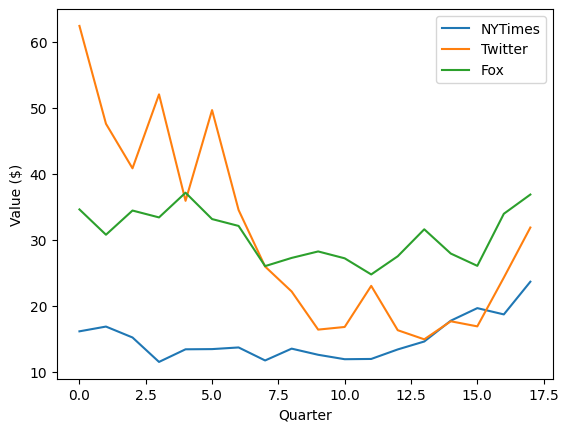

In [8]:
path='stock_data_nyt_fox_twitter.csv'

stock_data = pd.read_csv(path)
stock_data.plot()
plt.xlabel('Quarter')
plt.ylabel('Value ($)')
plt.show()

## Inputs: Covariance Matrix II

To make computations more manageable, we store variances and covariances of assets in a covariance matrix. A covariance matrix is symmetric, with the variance of each asset on the diagonal. 

In [9]:
path='stock_data.csv'

stock_data = pd.read_csv(path)
selected=list(stock_data.columns[1:])

returns_quarterly = stock_data[selected].pct_change()
expected_returns = returns_quarterly.mean()

returns_cov = returns_quarterly.cov()

print(returns_cov.round(4))


            Delta  Jet Blue  Chevron   Exxon   Adobe  Honeywell
Delta      0.0578    0.0379  -0.0004  0.0021  0.0042     0.0081
Jet Blue   0.0379    0.0450  -0.0018  0.0024 -0.0015     0.0055
Chevron   -0.0004   -0.0018   0.0110  0.0070  0.0046     0.0070
Exxon      0.0021    0.0024   0.0070  0.0072  0.0031     0.0062
Adobe      0.0042   -0.0015   0.0046  0.0031  0.0225     0.0113
Honeywell  0.0081    0.0055   0.0070  0.0062  0.0113     0.0132


<Axes: >

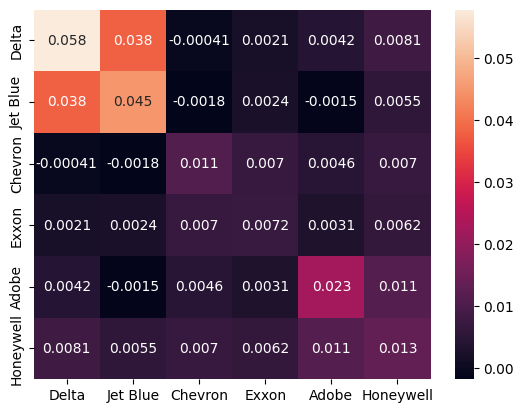

In [10]:
# display the returns_cov matrix in a heatmap
import seaborn as sns
sns.heatmap(returns_cov, annot=True)